In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  #adjust the configuration of the plots we will create

In [2]:
df = pd.read_csv('movies..csv')

In [3]:
# let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# let's see if there is any missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {} %'.format(col, percent_missing*100))

name - 0.0 %
rating - 1.004173187271779 %
genre - 0.0 %
year - 0.0 %
released - 0.02608242044861763 %
score - 0.03912363067292645 %
votes - 0.03912363067292645 %
director - 0.0 %
writer - 0.03912363067292645 %
star - 0.013041210224308816 %
country - 0.03912363067292645 %
budget - 28.31246739697444 %
gross - 2.464788732394366 %
company - 0.2217005738132499 %
runtime - 0.05216484089723526 %


In [5]:
df = df.dropna()

In [6]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# change data type of columns

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [8]:
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [9]:
# Create correct Year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [10]:
df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [11]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [12]:
pd.set_option('display.max_rows', None)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         5421 non-null   object 
 1   rating       5421 non-null   object 
 2   genre        5421 non-null   object 
 3   year         5421 non-null   int64  
 4   released     5421 non-null   object 
 5   score        5421 non-null   float64
 6   votes        5421 non-null   float64
 7   director     5421 non-null   object 
 8   writer       5421 non-null   object 
 9   star         5421 non-null   object 
 10  country      5421 non-null   object 
 11  budget       5421 non-null   int64  
 12  gross        5421 non-null   int64  
 13  company      5421 non-null   object 
 14  runtime      5421 non-null   float64
 15  yearcorrect  5421 non-null   int32  
dtypes: float64(3), int32(1), int64(3), object(9)
memory usage: 698.8+ KB


In [14]:
#drop any duplicates

df = df.drop_duplicates()

In [15]:
# Budget high correlation
# company high correlation

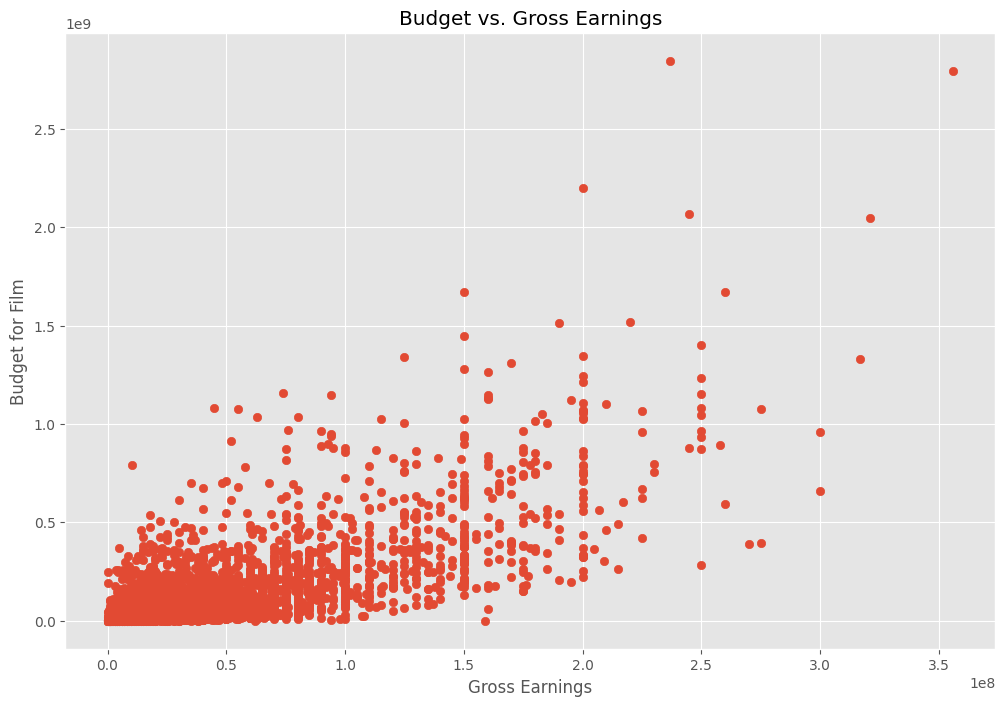

In [16]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y = df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

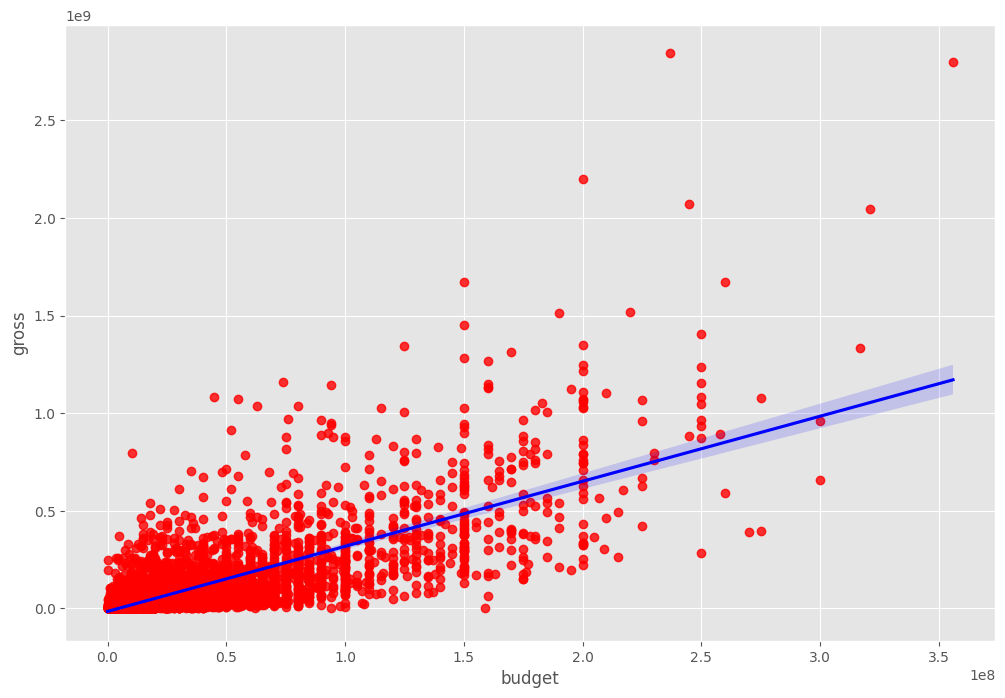

In [17]:
# Plot budget vs. gross with Seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'});

In [18]:
# let's start looking at corr

num = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num].corr()   #pearson, kendall, spearman
correlation_matrix

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [19]:
#High corr between budget and gross - true

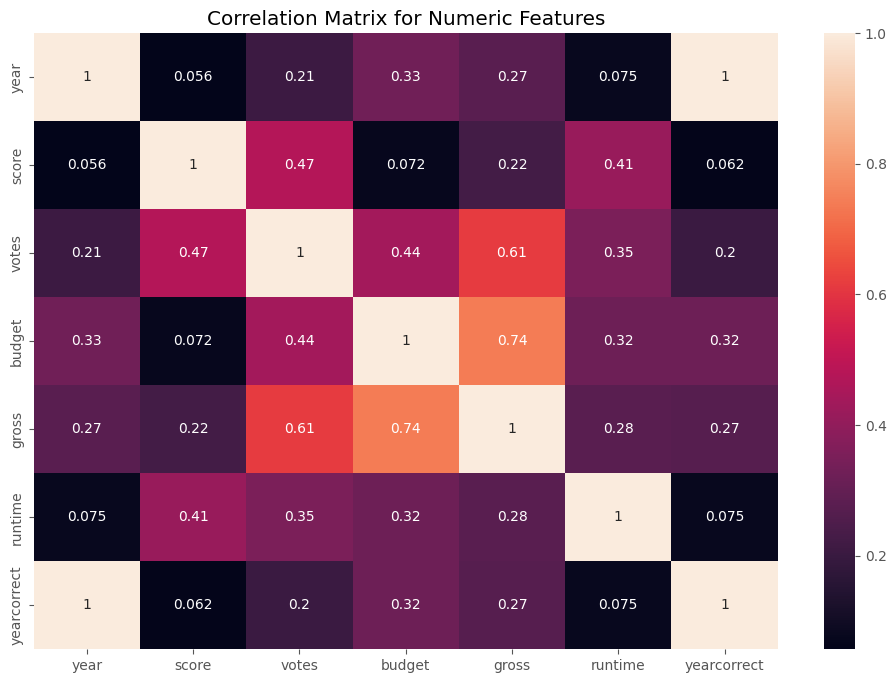

In [20]:
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.show();

In [21]:
# Looking at Company

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980
5,1509,6,9,1980,1922,6.4,123000.0,1758,3081,155,47,550000,39754601,1108,95.0,1980
6,3930,6,0,1980,1359,7.9,188000.0,974,576,860,47,27000000,115229890,1397,133.0,1980
7,3122,6,3,1980,530,8.2,330000.0,1269,1257,1469,47,18000000,23402427,390,129.0,1980
8,3732,4,0,1980,1346,6.8,101000.0,1606,1402,595,47,54000000,108185706,548,127.0,1981
9,4401,6,3,1980,1755,7.0,10000.0,2011,280,402,47,10000000,15795189,1391,100.0,1980


In [22]:
df_numerized.sort_values(by = ['company']).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
4345,109,6,0,2003,174,6.1,46000.0,567,494,1785,47,36000000,44350926,0,109.0,2003
7525,5161,5,2,2019,904,7.5,28000.0,1209,1903,1033,26,11100000,193457467,1,112.0,2020
3024,3346,3,4,1996,209,6.8,5300.0,1858,2886,1655,47,250000,10580,2,96.0,1997
2929,2068,4,1,1996,2046,5.6,95000.0,215,2467,120,47,60000000,129832389,3,89.0,1996
3525,526,4,4,1999,515,6.9,112000.0,280,1211,1486,47,100000000,87423861,3,132.0,1999
385,2329,4,0,1983,46,6.3,11000.0,1833,236,318,47,5000000,12232628,4,107.0,1983
4412,1525,4,4,2003,1362,2.1,25000.0,1656,1754,994,47,12000000,4928883,5,81.0,2003
7109,3996,5,6,2017,152,5.3,87000.0,805,1292,533,45,18000000,40656399,6,110.0,2017
6517,153,6,0,2014,2423,6.5,115000.0,1745,1803,1083,47,28000000,58834384,7,114.0,2014
4151,2471,6,4,2002,22,6.6,34000.0,1192,1884,86,47,500000,264349,8,93.0,2003


In [23]:
df.sort_values(by = ['company']).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
4345,A Man Apart,R,Action,2003,"April 4, 2003 (United States)",6.1,46000.0,F. Gary Gray,Christian Gudegast,Vin Diesel,United States,36000000,44350926,"""DIA"" Productions GmbH & Co. KG",109.0,2003
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000.0,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112.0,2020
3024,Schizopolis,Not Rated,Comedy,1996,"April 9, 1997 (United States)",6.8,5300.0,Steven Soderbergh,Steven Soderbergh,Steven Soderbergh,United States,250000,10580,.406 Production,96.0,1997
2929,Jingle All the Way,PG,Adventure,1996,"November 22, 1996 (United States)",5.6,95000.0,Brian Levant,Randy Kornfield,Arnold Schwarzenegger,United States,60000000,129832389,1492 Pictures,89.0,1996
3525,Bicentennial Man,PG,Comedy,1999,"December 17, 1999 (United States)",6.9,112000.0,Chris Columbus,Isaac Asimov,Robin Williams,United States,100000000,87423861,1492 Pictures,132.0,1999
385,Lone Wolf McQuade,PG,Action,1983,"April 15, 1983 (United States)",6.3,11000.0,Steve Carver,B.J. Nelson,Chuck Norris,United States,5000000,12232628,1818 Productions,107.0,1983
4412,From Justin to Kelly,PG,Comedy,2003,"June 20, 2003 (United States)",2.1,25000.0,Robert Iscove,Kim Fuller,Kelly Clarkson,United States,12000000,4928883,19 Entertainment,81.0,2003
7109,The Circle,PG-13,Drama,2017,"April 28, 2017 (United States)",5.3,87000.0,James Ponsoldt,James Ponsoldt,Emma Watson,United Arab Emirates,18000000,40656399,1978 Films,110.0,2017
6517,A Walk Among the Tombstones,R,Action,2014,"September 19, 2014 (United States)",6.5,115000.0,Scott Frank,Lawrence Block,Liam Neeson,United States,28000000,58834384,1984 Private Defense Contractors,114.0,2014
4151,May,R,Comedy,2002,"April 11, 2003 (Denmark)",6.6,34000.0,Lucky McKee,Lucky McKee,Angela Bettis,United States,500000,264349,2 Loop Films,93.0,2003


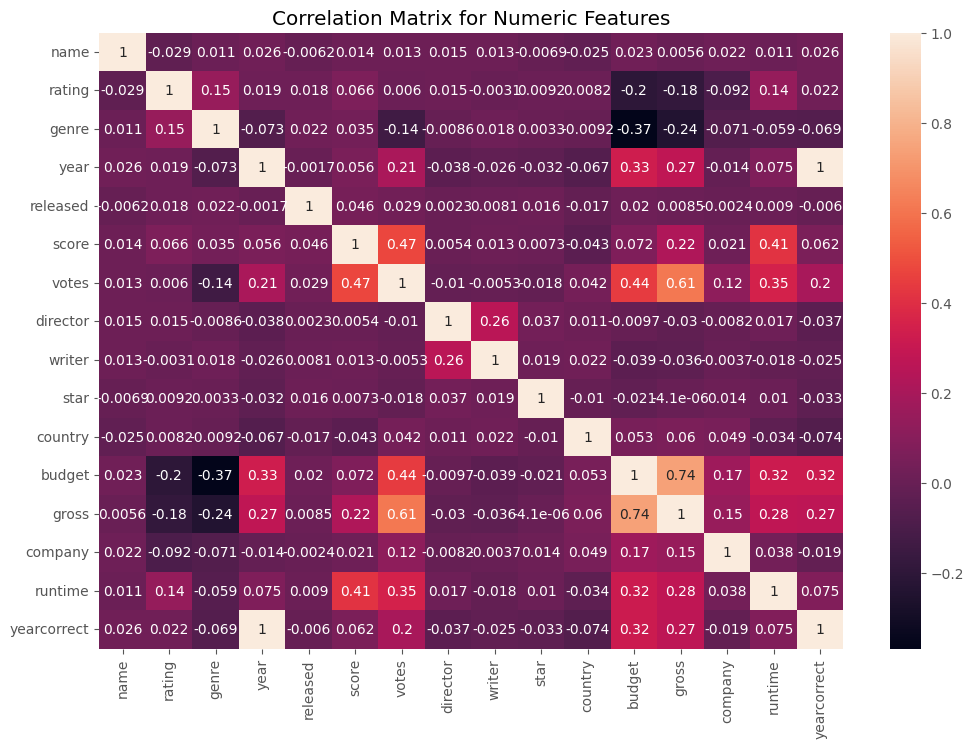

In [24]:
num = df_numerized.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df_numerized[num].corr()


sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show();

In [25]:
corr_pairs = correlation_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [26]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [27]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [28]:
# Votes and budget have the highest correlation to gross earnings

# Company name has low correlation to gross earnings